<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_100Hz_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_100Hz.csv',sep=';')
df.dropna(inplace=True)
df.head()


,,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Group,AR2,Equivalent Diameter,Circ sqrt
0,169,210902_#4_100_30_1um_i002.tif:0124-0106,2977.920,438.884,94.390,40.169,85.995,0.194,113.371,102.0,147.0,79.919,53.536,2.350,0.426,0.654,0,0.472220,61.576014,0.440770
1,169,210902_#5_100_20_1um_i005.tif:0539-2012,2682.589,467.197,67.979,50.245,9.165,0.154,109.253,1990.0,535.0,177.397,74.108,1.353,0.739,0.476,0,0.678315,58.442950,0.392990
2,170,210902_#4_100_30_1um_i002.tif:0174-0182,836.771,189.075,45.890,23.216,153.454,0.294,59.168,172.0,169.0,146.976,32.056,1.977,0.506,0.598,0,0.541779,32.640618,0.542343
3,170,210902_#5_100_20_1um_i005.tif:0529-2408,2454.938,399.696,62.957,49.649,61.143,0.193,82.901,2395.0,539.0,51.072,64.960,1.268,0.789,0.596,0,0.783585,55.908176,0.439436
4,171,210902_#4_100_30_1um_i002.tif:0406-0210,1790.443,217.387,65.386,34.865,143.540,0.476,71.934,201.0,396.0,136.397,43.690,1.875,0.533,0.774,0,0.607362,47.745815,0.690004


In [41]:
df['Nanocząstki'] = df['Group'].map({0:'Aglomeraty',1:"Cząstki kuliste"})

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=2,random_state=666)

In [91]:
df_kcluster = df[['Perim.','Feret','MinFeret','Round', 'Equivalent Diameter','Circ sqrt','Solidity', 'AR2' ,'Area']].copy()
df_kcluster.head(3)

,Perim.,Feret,MinFeret,Round,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,438.884,113.371,53.536,0.426,61.576014,0.440770,0.654,0.472220,2977.920
1,467.197,109.253,74.108,0.739,58.442950,0.392990,0.476,0.678315,2682.589
2,189.075,59.168,32.056,0.506,32.640618,0.542343,0.598,0.541779,836.771


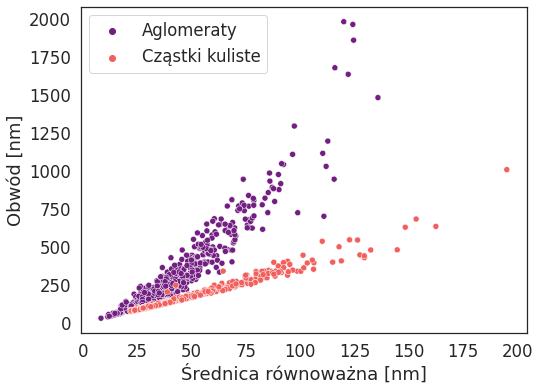

In [51]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.set_style(style='white')
sns.scatterplot(data=df, y='Perim.',x='Equivalent Diameter', hue='Nanocząstki',palette='magma')
plt.xlabel('Średnica równoważna [nm]')
plt.ylabel('Obwód [nm]')
plt.legend().set_title('')

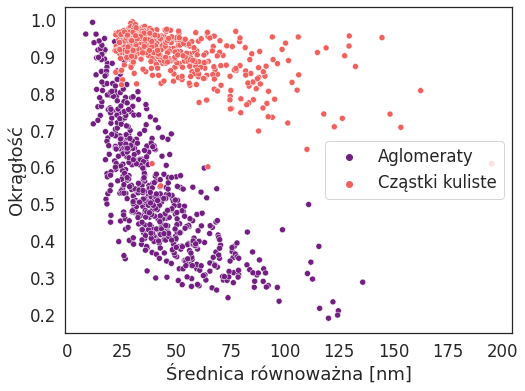

In [52]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.set_style(style='white')
sns.scatterplot(data=df, y='Circ sqrt',x='Equivalent Diameter', hue='Nanocząstki',palette='magma')
plt.xlabel('Średnica równoważna [nm]')
plt.ylabel('Okrągłość')
plt.legend().set_title('')

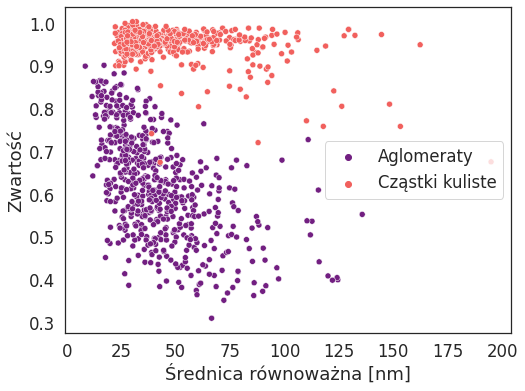

In [74]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.set_style(style='white')
sns.scatterplot(data=df, y='Solidity',x='Equivalent Diameter', hue='Nanocząstki',palette='magma')
plt.xlabel('Średnica równoważna [nm]')
plt.ylabel('Zwartość')
plt.legend().set_title('')

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_kcluster)
df_kcluster_scaled = scaler.transform(df_kcluster)

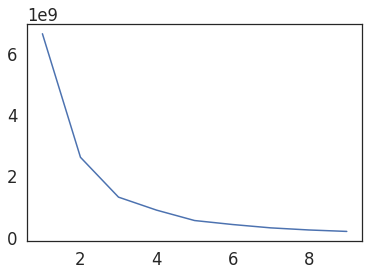

In [55]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df_kcluster)
    wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1,10),wcss)

In [56]:
df_kcluster_scaled = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)

,Perim.,Perim.,Feret,MinFeret,Round,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,0.210848,0.210848,0.241122,0.291550,0.328851,0.285075,0.311416,0.495677,0.376402,0.098100
1,0.225358,0.225358,0.231288,0.421668,0.711491,0.268280,0.251960,0.239193,0.661452,0.088187


In [207]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=10)

In [184]:
from sklearn.cluster import SpectralClustering

In [185]:
kmeans = SpectralClustering(
                        n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=32
                            )

In [208]:
kmeans.fit(df_kcluster_scaled)

KMeans(n_clusters=2)

In [209]:
#sns.scatterplot(data=df_kcluster, y='Perim.',x='Equivalent Diameter', hue=kmeans.labels_)

In [210]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [211]:
df_kcluster['grupa_klastry'] = kmeans.labels_

In [212]:
df_kcluster['grupa_klastry'] = df_kcluster['grupa_klastry'].map({0:'Aglomeraty',1:"Cząstki kuliste"})

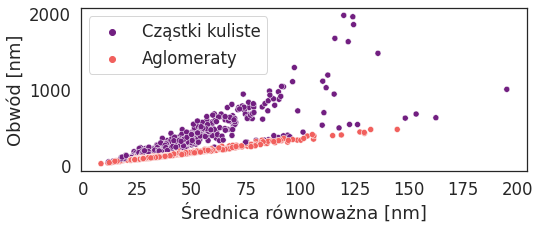

In [213]:
plt.figure(figsize=(8,3))
sns.set(font_scale=1.5)
sns.set_style(style='white')
sns.scatterplot(data=df_kcluster, y='Perim.',x='Equivalent Diameter', hue='grupa_klastry',palette='magma')
plt.xlabel('Średnica równoważna [nm]')
plt.ylabel('Obwód [nm]')
plt.legend().set_title('')

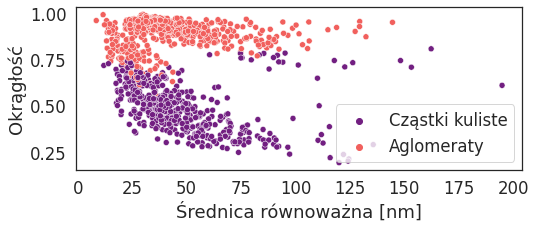

In [214]:
plt.figure(figsize=(8,3))
sns.set(font_scale=1.5)
sns.set_style(style='white')
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue='grupa_klastry',palette='magma')
plt.xlabel('Średnica równoważna [nm]')
plt.ylabel('Okrągłość')
plt.legend().set_title('')

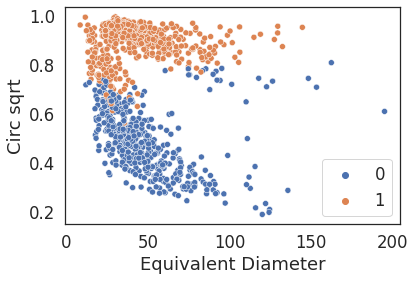

In [70]:
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=kmeans.labels_)

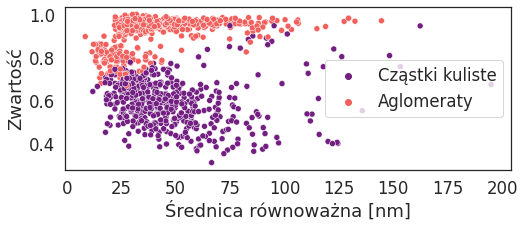

In [215]:
plt.figure(figsize=(8,3))
sns.set(font_scale=1.5)
sns.set_style(style='white')
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue='grupa_klastry',palette='magma')
plt.xlabel('Średnica równoważna [nm]')
plt.ylabel('Zwartość')
plt.legend().set_title('')

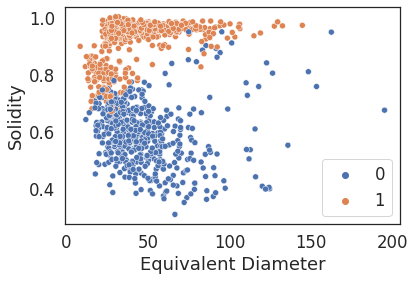

In [71]:
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=kmeans.labels_)

In [195]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['Group'],kmeans.labels_))

[[544  37]
 [  4 559]]


In [196]:
print(classification_report(df['Group'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       581
           1       0.94      0.99      0.96       563

    accuracy                           0.96      1144
   macro avg       0.97      0.96      0.96      1144
weighted avg       0.97      0.96      0.96      1144



In [197]:
from sklearn.metrics import ConfusionMatrixDisplay

Text(0.5, 0, 'Klasa przewidywana')

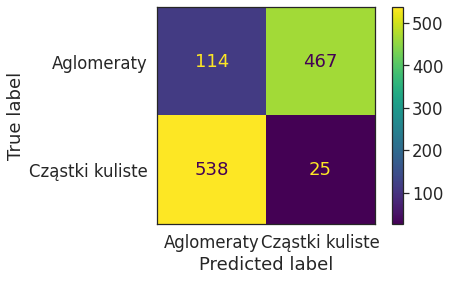

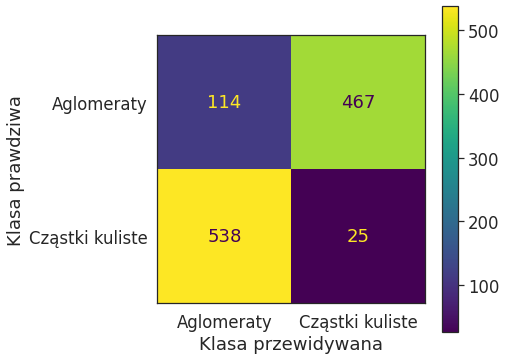

In [216]:
cmp = ConfusionMatrixDisplay.from_predictions(df['Nanocząstki'],df_kcluster['grupa_klastry'])

fig, ax = plt.subplots(figsize=(6,6))
cmp.plot(ax=ax)
plt.ylabel('Klasa prawdziwa')
plt.xlabel('Klasa przewidywana')

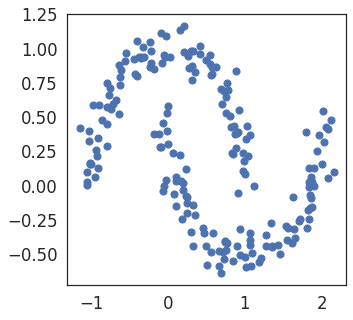

In [176]:
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(200, noise=.09, random_state=random_state)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_mn[:, 0], X_mn[:, 1],
          # c=y_mn,
           s=dot_size, 
      #     cmap=cmap
           )

In [177]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=10)

In [178]:
kmeans.fit(X_mn)

KMeans(n_clusters=2)

In [179]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0], dtype=int32)

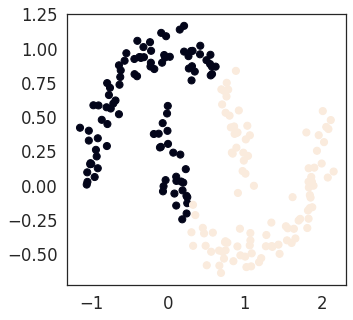

In [180]:
dot_size=50
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_mn[:, 0], X_mn[:, 1],
           c=kmeans.labels_,
           s=dot_size, 
      #     cmap=cmap
           )

In [181]:
kmeans = SpectralClustering(
                        n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=32
                            )

In [182]:
kmeans.fit(X_mn)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=32)

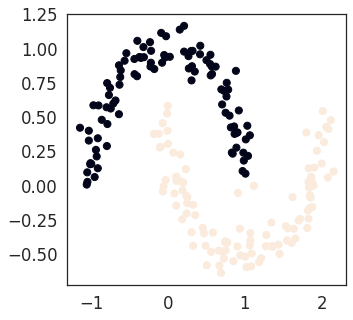

In [183]:
dot_size=50
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_mn[:, 0], X_mn[:, 1],
           c=kmeans.labels_,
           s=dot_size, 
      #     cmap=cmap
           )